Inspired from : https://github.com/erellaz/ISS_tracker

To list COM clients, run the following command in PowerShell

```powershell
Get-ChildItem HKLM:\Software\Classes -ErrorAction SilentlyContinue | Where-Object {
$_.PSChildName -match '^\w+\.\w+$' -and (Test-Path -Path "$($_.PSPath)\CLSID")
} | Select-Object -ExpandProperty PSChildName 
```

In [9]:
# Test ascom driver compliance with standards
# See erellaz.com for more information
# 2018-07-15

#_______________________________________________________________
# Choose an Ascom Driver
import win32com.client      #needed to load COM objects
import ephem
import datetime
import time
import sys

In [23]:
#Use chooser
# x = win32com.client.Dispatch("ASCOM.Utilities.Chooser")
# x.DeviceType = 'Telescope'
# driverName=x.Choose("None")
# tel=win32com.client.Dispatch(driverName)

#OR use directly one of those
# tel = win32com.client.Dispatch("EQMOD_SIM.Telescope")
tel = win32com.client.Dispatch("EQMOD.Telescope")

print("You have choosen the following driver:",tel)

You have choosen the following driver: <COMObject EQMOD.Telescope>


In [24]:
#_______________________________________________________________
# Connect to the telescope
if tel.Connected:
    print("	->Telescope was already connected")
else:
    tel.Connected = True
    if tel.Connected:
        print("	Connected to telescope now")
    else:
        print("	Unable to connect to telescope, expect exception")

	Connected to telescope now


In [54]:
#_______________________________________________________________
# Querying telescope
# tel.Tracking = True
print("Querying telescope:")
print("Can move axis RA Dec Rotator?", tel.CanMoveAxis(0)[0], tel.CanMoveAxis(1)[0], tel.CanMoveAxis(2)[0])
print("Axis rates count:",tel.AxisRates(0)[0].count)
print("Axis rates 0-RA Max:",tel.AxisRates(0)[0].Item(1).Maximum)
print("Axis rates 0-RA Min:",tel.AxisRates(0)[0].Item(1).Minimum)
print("Axis rates 1-DEC Max:",tel.AxisRates(1)[0].Item(1).Maximum)
print("Axis rates 1-DEC Min:",tel.AxisRates(1)[0].Item(1).Minimum)

Querying telescope:
Can move axis RA Dec Rotator? True True False
Axis rates count: 1
Axis rates 0-RA Max: 3.3424593333333332
Axis rates 0-RA Min: 0.0
Axis rates 1-DEC Max: 3.3424593333333332
Axis rates 1-DEC Min: 0.0


In [5]:
#_______________________________________________________________
# Reading telescope parameters through ASCOM

print("UTC Time from telescope:",tel.UTCDate)
#print("Sideral Time from telescope:",tel.SiderealTime)
print("Latitude:",tel.SiteLatitude)
print("Longitude:",tel.SiteLongitude)
print("Elevation:",tel.SiteElevation)

observer = ephem.Observer()
observer.long = str(tel.SiteLongitude)
observer.lat = str(tel.SiteLatitude)
observer.elevation = tel.SiteElevation
observer.date = datetime.datetime.now(datetime.timezone.utc)

UTC Time from telescope: 2024-10-16 18:17:20+00:00
Latitude: 46.51858333333333
Longitude: 6.5666111111111105
Elevation: 100.0


In [8]:
#_______________________________________________________________
#Testing
RA0=float(20)
DEC0=float(20)
print("Slewing to initial position:", RA0, DEC0)
tel.SlewToCoordinates(RA0,DEC0) 

print("Moving about axis 0-RA at 2 degree per second:")        
tel.MoveAxis(0, 0.0)   #degree per second
tel.MoveAxis(1, 0.0)  #degree per second
for i in range(1):
     tel.MoveAxis(0, 2)   #degree per second     
     print(datetime.datetime.now(),"RA:",tel.RightAscension,"Dec:",tel.Declination)
     sys.stdout.flush()     
     time.sleep(1)

print("Moving about axis 1-DEC at 3 degree per second:")         
tel.MoveAxis(0, 0.0)   #degree per second
tel.MoveAxis(1, 0.0)  #degree per second
for i in range(10):
     tel.MoveAxis(1, 3)   #degree per second     
     print(datetime.datetime.now(),"RA:",tel.RightAscension,"Dec:",tel.Declination) 
     sys.stdout.flush()     
     time.sleep(1)
     
tel.MoveAxis(0, 0.0)   #degree per second
tel.MoveAxis(1, 0.0)  #degree per second

Slewing to initial position: 20.0 20.0
Moving about axis 0-RA at 2 degree per second:
2024-10-12 14:56:52.206912 RA: 20.000036145775773 Dec: 19.99998670212766
Moving about axis 1-DEC at 3 degree per second:
2024-10-12 14:56:54.491951 RA: 19.952753560842908 Dec: 19.99998670212766
2024-10-12 14:56:56.650135 RA: 19.895674073970824 Dec: 20.72126329787234
2024-10-12 14:56:58.808391 RA: 19.896275159751845 Dec: 22.313816489361702
2024-10-12 14:57:01.028365 RA: 19.896893236291604 Dec: 23.966369680851063
2024-10-12 14:57:03.249615 RA: 19.897512148413742 Dec: 25.701582446808512
2024-10-12 14:57:05.470682 RA: 19.898130781950055 Dec: 27.436795212765958
2024-10-12 14:57:07.627892 RA: 19.898731589145243 Dec: 29.140731382978725
2024-10-12 14:57:09.784744 RA: 19.899332396340434 Dec: 30.703922872340424
2024-10-12 14:57:11.941794 RA: 19.89993320336052 Dec: 32.296156914893615
2024-10-12 14:57:14.099518 RA: 19.900534010555702 Dec: 33.9174335106383


(1, 0.0)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
ra, dec = [], []
sampling = 0.01
total_time = 10
cmd = np.linspace(0, -3.0, int(total_time/0.1))
for i in np.arange(0,total_time,sampling):
    if i%0.1 == 0:
        tel.MoveAxis(0, cmd[int(i/0.1)])
    ra.append(tel.RightAscension)
    dec.append(tel.Declination)
    time.sleep(sampling)
tel.MoveAxis(0,0)
tel.MoveAxis(1,0)

(1, 0.0)

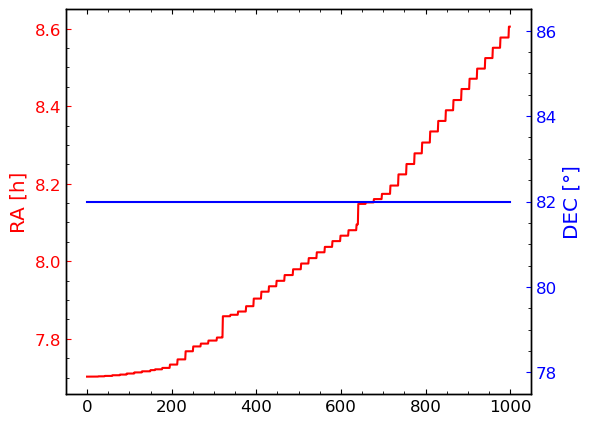

In [83]:
fig, ax = plt.subplots()

ax.plot(ra, 'r-', label='RA')
ax.set_ylabel('RA [h]', color='r')
ax.tick_params('y', colors='r')
ax2 = ax.twinx()
ax2.plot(dec, 'b-', label='DEC')
ax2.set_ylabel('DEC [°]', color='b')
ax2.tick_params('y', colors='b')
plt.show()

In [84]:
tel.Connected = False